In [38]:
%matplotlib inline
#This line makes plots a bit bigger
%config InlineBackend.figure_format = 'retina'

#Import required packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy

import matplotlib.pyplot as plt
import numpy as np

In [27]:
#The dataset we get via keras is already split into training and test sets, we just call the fuctions and magic is done.
#But later, we will combine this into one dataset.
(x_train, y_train), (x_val, y_val) = mnist.load_data()

#devide by 255, so that we have values between 0 and 1
x_train = x_train.astype('float32') / 255

#Here, we have categories for output - 0 - 9. We use to_categorical to convert the labels to one-hot vectors.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [28]:
#Just combining the training and validation sets
X = np.concatenate((x_train, x_val), axis=0)

Y = np.concatenate((y_train, y_val), axis=0)

In [30]:
#Defining that the model is sequential
model = tf.keras.Sequential([
    #Flatten the input to a 1D vector
    Flatten(input_shape=(28, 28)),
    #Add a fully connected layer with 128 neurons
    Dense(128, activation='relu'),
    #Add a fully connected layer with 128 neurons
    Dense(128, activation='relu'),
    #Add a fully connected layer with 128 neurons
    Dense(128, activation='relu'),
    #Add a fully connected layer with 10 neurons
    Dense(10,activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
# Fit the model
history = model.fit(X, Y, validation_split=0.10, epochs=15, batch_size=32)
# list all data in history
print(history.history.keys())

Epoch 1/15
1969/1969 [==============================] - 7s 3ms/step - loss: 0.0491 - accuracy: 0.9582 - val_loss: 5.3188 - val_accuracy: 0.8513
Epoch 2/15
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9611 - val_loss: 7.1517 - val_accuracy: 0.8834
Epoch 3/15
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9567 - val_loss: 6.8666 - val_accuracy: 0.8597
Epoch 4/15
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9747 - val_loss: 9.2165 - val_accuracy: 0.8967
Epoch 5/15
1969/1969 [==============================] - 4s 2ms/step - loss: 0.0147 - accuracy: 0.9786 - val_loss: 7.1653 - val_accuracy: 0.8610
Epoch 6/15
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0109 - accuracy: 0.9782 - val_loss: 5.5883 - val_accuracy: 0.8943
Epoch 7/15
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0113 - accuracy: 0.9766 - val_loss: 12.3899 - val_accuracy

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


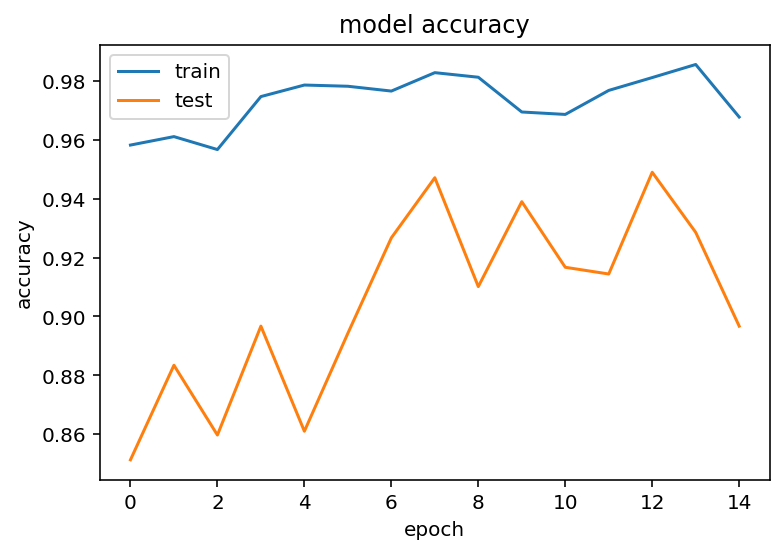

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

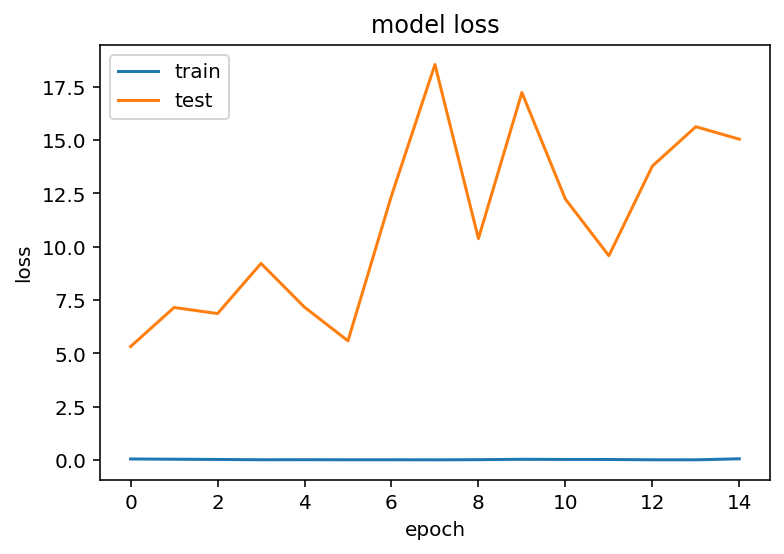

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()